# **Task 2: Data Cleaning & Missing Value Handling**
### 🎯 **Objective:**  To clean the dataset by handling missing values and improving data quality so it is ready for analysis and machine learning.

##**Step 1. Import the required modules**
What I did: I loaded the dataset using pandas and display the data using head() and tail()

In [130]:
import numpy as np
import pandas as pd

In [241]:
import matplotlib.pyplot as plt

In [135]:
train_dataset = pd.read_csv('House_Prices_Dataset/train.csv')

In [136]:
train_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
train_dataset.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## **Step 2: Visualize Missing Data**

What I did:
I created simple bar charts to see which columns have missing values. This made it easy to understand the missing data pattern visually.

In [138]:
train_dataset.shape

(1460, 81)

In [139]:
train_dataset.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [140]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [157]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [142]:
total_nulls = train_dataset.isnull().sum()

In [143]:
only_nulls = total_nulls[total_nulls > 0]
only_nulls

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [144]:
total_nulls_sum = only_nulls.sum()
print(total_nulls_sum)

7829


In [145]:
len(train_dataset)

1460

In [146]:
percentage_of_nulls_of_all_nulls = (only_nulls / total_nulls_sum) * 100
percentage_of_nulls_of_all_nulls

,0
LotFrontage,3.308213
Alley,17.486269
MasVnrType,11.138076
MasVnrArea,0.102184
BsmtQual,0.472602
BsmtCond,0.472602
BsmtExposure,0.485375
BsmtFinType1,0.472602
BsmtFinType2,0.485375
Electrical,0.012773


In [147]:
percentage_of_nulls_in_each_column = (only_nulls / len(train_dataset)) * 100
percentage_of_nulls_in_each_column

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [148]:
plt.style.use('fivethirtyeight')

In [149]:
# plotting the null value data
y_indexes = list(percentage_of_nulls_in_each_column.index)
x_indexes = [percentage_of_nulls_in_each_column[value] for value in y_indexes]

print(y_indexes)
print(x_indexes)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
[np.float64(17.73972602739726), np.float64(93.76712328767123), np.float64(59.726027397260275), np.float64(0.547945205479452), np.float64(2.5342465753424657), np.float64(2.5342465753424657), np.float64(2.6027397260273974), np.float64(2.5342465753424657), np.float64(2.6027397260273974), np.float64(0.0684931506849315), np.float64(47.26027397260274), np.float64(5.5479452054794525), np.float64(5.5479452054794525), np.float64(5.5479452054794525), np.float64(5.5479452054794525), np.float64(5.5479452054794525), np.float64(99.52054794520548), np.float64(80.75342465753424), np.float64(96.30136986301369)]


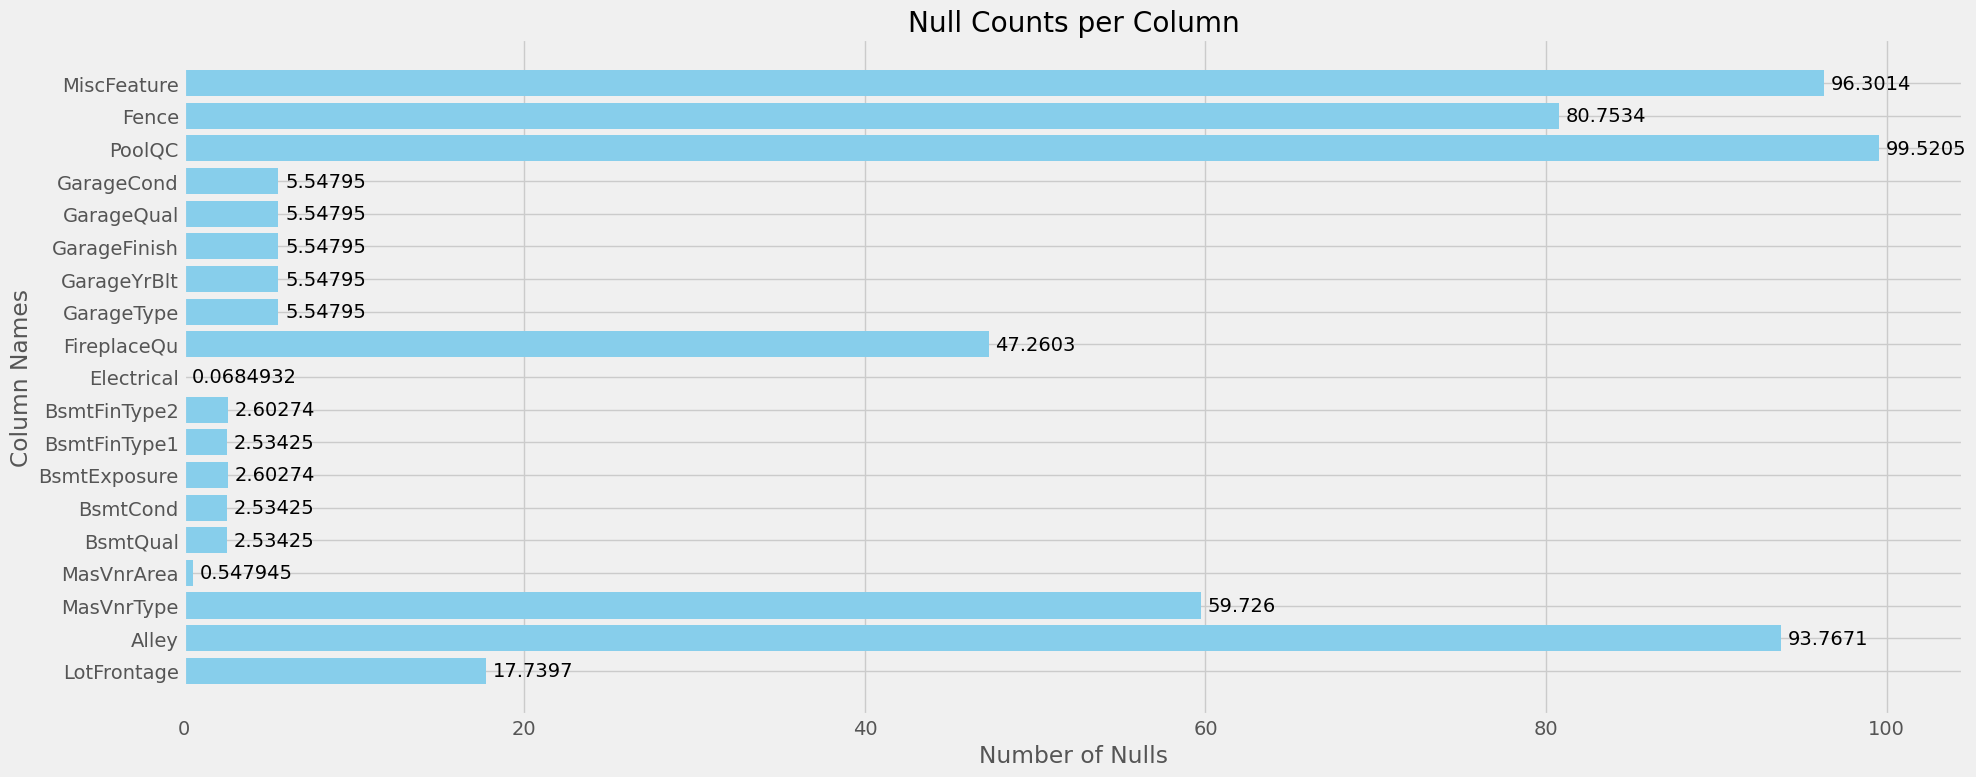

In [150]:
bars = plt.barh(y_indexes,x_indexes,color='skyblue',height=0.8)
plt.title('Null Counts per Column')
plt.xlabel('Number of Nulls')
plt.ylabel('Column Names')
plt.bar_label(bars, padding=5)  # Add values on bars
plt.tight_layout()
plt.savefig('missing-value-chart.png')
plt.show() # 100% mean 1460 of total values

## **Step 3: Remove Columns with Very High Missing Values**

What I did:
I removed columns that had too many missing values because they were not useful and could reduce model performance.

In [169]:
# Removing columns with null values > 60 %

percentage_of_nulls_in_each_column

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


In [173]:
cols_to_drop = [col for col,value in percentage_of_nulls_in_each_column.items() if value > 60]
cols_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [174]:
filtered_dataset = train_dataset.drop(columns=cols_to_drop)
filtered_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## **Step 4 & 5: Handling Missing Values (Numerical and Categorical)**

What I did:
I filled missing values in numerical columns using the **median** and in categorical columns using the most common value **(mode)**. This helps avoid errors, keeps the data balanced, and makes the dataset consistent and ready for analysis.

In [176]:
mean_data = filtered_dataset.describe().loc['mean']
mean_data

,mean
Id,730.500000
MSSubClass,56.897260
LotFrontage,70.049958
LotArea,10516.828082
OverallQual,6.099315
OverallCond,5.575342
YearBuilt,1971.267808
YearRemodAdd,1984.865753
MasVnrArea,103.685262
BsmtFinSF1,443.639726


In [178]:
median_data = filtered_dataset.describe().loc['50%']
median_data

,50%
Id,730.5
MSSubClass,50.0
LotFrontage,69.0
LotArea,9478.5
OverallQual,6.0
OverallCond,5.0
YearBuilt,1973.0
YearRemodAdd,1994.0
MasVnrArea,0.0
BsmtFinSF1,383.5


In [180]:
numerical_cols = filtered_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = filtered_dataset.select_dtypes(include=['object']).columns.tolist()

In [181]:
print(numerical_cols)
print(categorical_cols)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 

In [187]:
filtered_data_nulls = filtered_dataset.isnull().sum()
filtered_data_nulls[filtered_data_nulls > 0]

,0
LotFrontage,259
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


In [193]:
for col in categorical_cols:
    filtered_dataset[col] = filtered_dataset[col].fillna(filtered_dataset[col].mode()[0])

In [194]:
filtered_data_nulls = filtered_dataset.isnull().sum()
filtered_data_nulls[filtered_data_nulls > 0]

,0
LotFrontage,259
MasVnrArea,8
GarageYrBlt,81


In [225]:
for col in numerical_cols:
    filtered_dataset[col] = filtered_dataset[col].fillna(filtered_dataset[col].median())

In [209]:
#--------------------finally removed the null values and replaced by mode, median---------------------------------#

## **Step 6: Validate the Cleaned Dataset**
What I did: I checked for remaining missing values, dataset shape, data types, duplicates, and basic statistics to make sure the dataset is clean and ready for use.

In [226]:
# only three cols of numerical type has null values(259,8,81)
filtered_data_nulls = filtered_dataset.isnull().sum()
filtered_data_nulls[filtered_data_nulls > 0]

,0


In [232]:
filtered_dataset.describe() # Now this dataset has no null values

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [230]:
# 1. Check missing values
filtered_dataset.isnull().sum().sum()

np.int64(0)

In [231]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [228]:
filtered_dataset.to_csv('Filtered_dataset.csv')

## **Step 7: Compare Before vs After Cleaning**
What I did: I compared the dataset before and after cleaning by checking rows, columns, and total missing values to show that data quality has improved.

In [ ]:
#-----------------------------------After vs Before------------------------------------#

In [237]:
print(train_dataset.shape)
print(filtered_dataset.shape) # Removed columns : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

(1460, 81)
(1460, 77)


In [236]:
print(train_dataset.isnull().sum().sum())
print(filtered_dataset.isnull().sum().sum())

7829
0


In [240]:
comparison = pd.DataFrame({
    "Stage": ["Before Cleaning", "After Cleaning"],
    "Rows": [train_dataset.shape[0], filtered_dataset.shape[0]],
    "Columns": [train_dataset.shape[1], filtered_dataset.shape[1]],
    "Total-Missing-Values": [
        train_dataset.isnull().sum().sum(),
        filtered_dataset.isnull().sum().sum(),
    ]
})

comparison

,Stage,Rows,Columns,Total-Missing-Values
0,Before Cleaning,1460,81,7829
1,After Cleaning,1460,77,0
